<img style="float: right; margin: 0px 0px 15px 15px;" src="https://educationusa.state.gov/sites/default/files/wysiwyg/iteso_logo.jpg" width="520px" height="230px" />

# <span style="color: darkblue; ">TECHNICAL ANALYSIS PROJECT</span>
`MICROSTRUCTURE AND TRADING SYSTEMS`

- Juan Ramón Rocha Exp:739950

Repository on GitHub: Link del repositorio

### Introduction
<div style="text-align: justify;">
Technical analysis is a trading discipline used to forecast the direction of prices by studying past market data, primarily price and volume. Operating on the premise that history tends to repeat itself, this approach focuses on identifying chart patterns and statistical trends to predict future market behavior. Instead of digging into a company's financial health, technical analysts use charts as their primary tool to pinpoint optimal moments to buy or sell, aiming to maximize returns and manage risk. This method, which originated with Charles Dow in the late 19th century, has become a cornerstone of modern trading strategies and provides the framework for the Python-based implementation developed in this project.
</div>

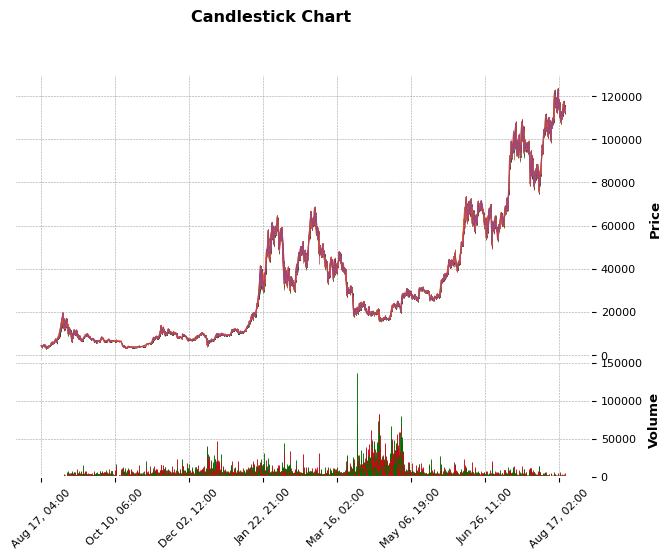

In [18]:
import pandas as pd
import mplfinance as mpf
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

data = pd.read_csv("files/Binance_BTCUSDT_1h.csv", header=1)
data.rename(columns={'Volume BTC':'Volume'}, inplace=True)

data.index = pd.to_datetime(data['Date'], format="ISO8601")
data.sort_index(inplace=True)

mpf_style = mpf.make_mpf_style(base_mpf_style='charles', rc={'font.size': 8})

mpf.plot(data, type='candle', style=mpf_style, volume=True, title='Candlestick Chart', mav=(3,6,9))

At a high level, this chart shows that BTCUSDT symbol have had an upward trend with an increase in price over the displayed time. Additionally, the transaction volume has varied, with some peaks that could correlate with significant price's drop.

### Technical Indicators
This project utilizes three key technical indicators to analyze market trends and generate trading signals. Each indicator offers a unique perspective on price action, from trend smoothing to measuring volatility and momentum.

#### Simple Moving Average (SMA)
The Simple Moving Average (SMA) is a fundamental indicator that smooths out price data to create a single flowing line, making it easier to identify the underlying trend. Think of it as looking at the average price over a specific period, which helps filter out the "noise" of short-term price fluctuations.

A common trading strategy involves watching for crossovers, where the asset's price crosses above or below the SMA line, often signaling a potential shift in momentum.

In the implemented code, this indicator uses the following parameters:

* `period`: The number of recent data points (e.g., 20 days) used to calculate the average. A shorter period reacts more quickly to price changes, while a longer period provides a smoother, less sensitive line.

* `file_path`: The path to the CSV file containing the historical price data needed for the calculation.

#### Bollinger Bands
Bollinger Bands are a powerful volatility indicator. They consist of three lines: a Simple Moving Average in the middle, an upper band, and a lower band. The upper and lower bands are typically placed two standard deviations away from the middle band.

The key feature is that the bands widen when market volatility increases and narrow when volatility decreases. This provides a dynamic range of expected price movement. Traders often use them to:

* Identify overbought conditions when the price touches the upper band.

* Identify oversold conditions when the price touches the lower band.

* Spot potential price breakouts when the bands tighten significantly (a "squeeze").

Parameters used in the code:

* `window`: The period used for calculating the middle band's SMA (e.g., 20 periods).

* `window_dev`: The number of standard deviations to set the upper and lower bands from the middle band. A value of 2 is standard.

* `fillna`: A boolean to determine if empty values generated during the initial calculation period should be filled.

#### Relative Strength Index (RSI)
The Relative Strength Index (RSI) is a momentum oscillator that measures the speed and change of price movements. The RSI oscillates between 0 and 100 and is primarily used to identify overbought or oversold conditions in a market.

* Overbought: An RSI reading above 70 suggests that an asset may be overvalued and is a candidate for a price pullback or reversal.

* Oversold: An RSI reading below 30 suggests that an asset may be undervalued and is a candidate for a price rally.

### Optimal Strategy Analysis: RSI Mean Reversion

The optimization process concluded that the most profitable strategy is a classic mean-reversion approach based on a single technical indicator: the Relative Strength Index (RSI). This strategy operates on the principle that assets tend to revert to their average price after extreme movements. It identifies potential entry points by detecting oversold and overbought market conditions.

The specific hyperparameters identified to maximize this strategy's effectiveness on a 1-hour timeframe are as follows:

* Trading Strategy: The model exclusively uses the RSI indicator to generate trading signals.

* Number of Shares (n_shares): All trades are executed with a fixed size of 2 shares. This controls the capital allocated to each position.

* RSI Window (rsi_window): The RSI is calculated using a lookback period of 18 periods. This determines the sensitivity of the indicator to recent price action.

* RSI Buy Trigger (rsi_buy_threshold): A buy signal is generated when the RSI value drops below 20. This indicates a strong oversold condition, suggesting that the downward price momentum may be exhausted and a price reversal (upward) is likely.

* RSI Sell Trigger (rsi_sell_threshold): A sell (or short) signal is generated when the RSI value rises above 67. This points to a significant overbought condition, suggesting that the upward trend may be losing steam and a price correction (downward) is imminent.

* Risk Management (Long Positions):
    - Take Profit (tp_long_factor): A long position will be automatically closed for a profit if the price increases by approximately 4.34% from the entry point (1.0434).
    - Stop Loss (sl_long_factor): To limit potential losses, a long position will be automatically closed if the price drops by approximately 1.01% from the entry point (0.9899).

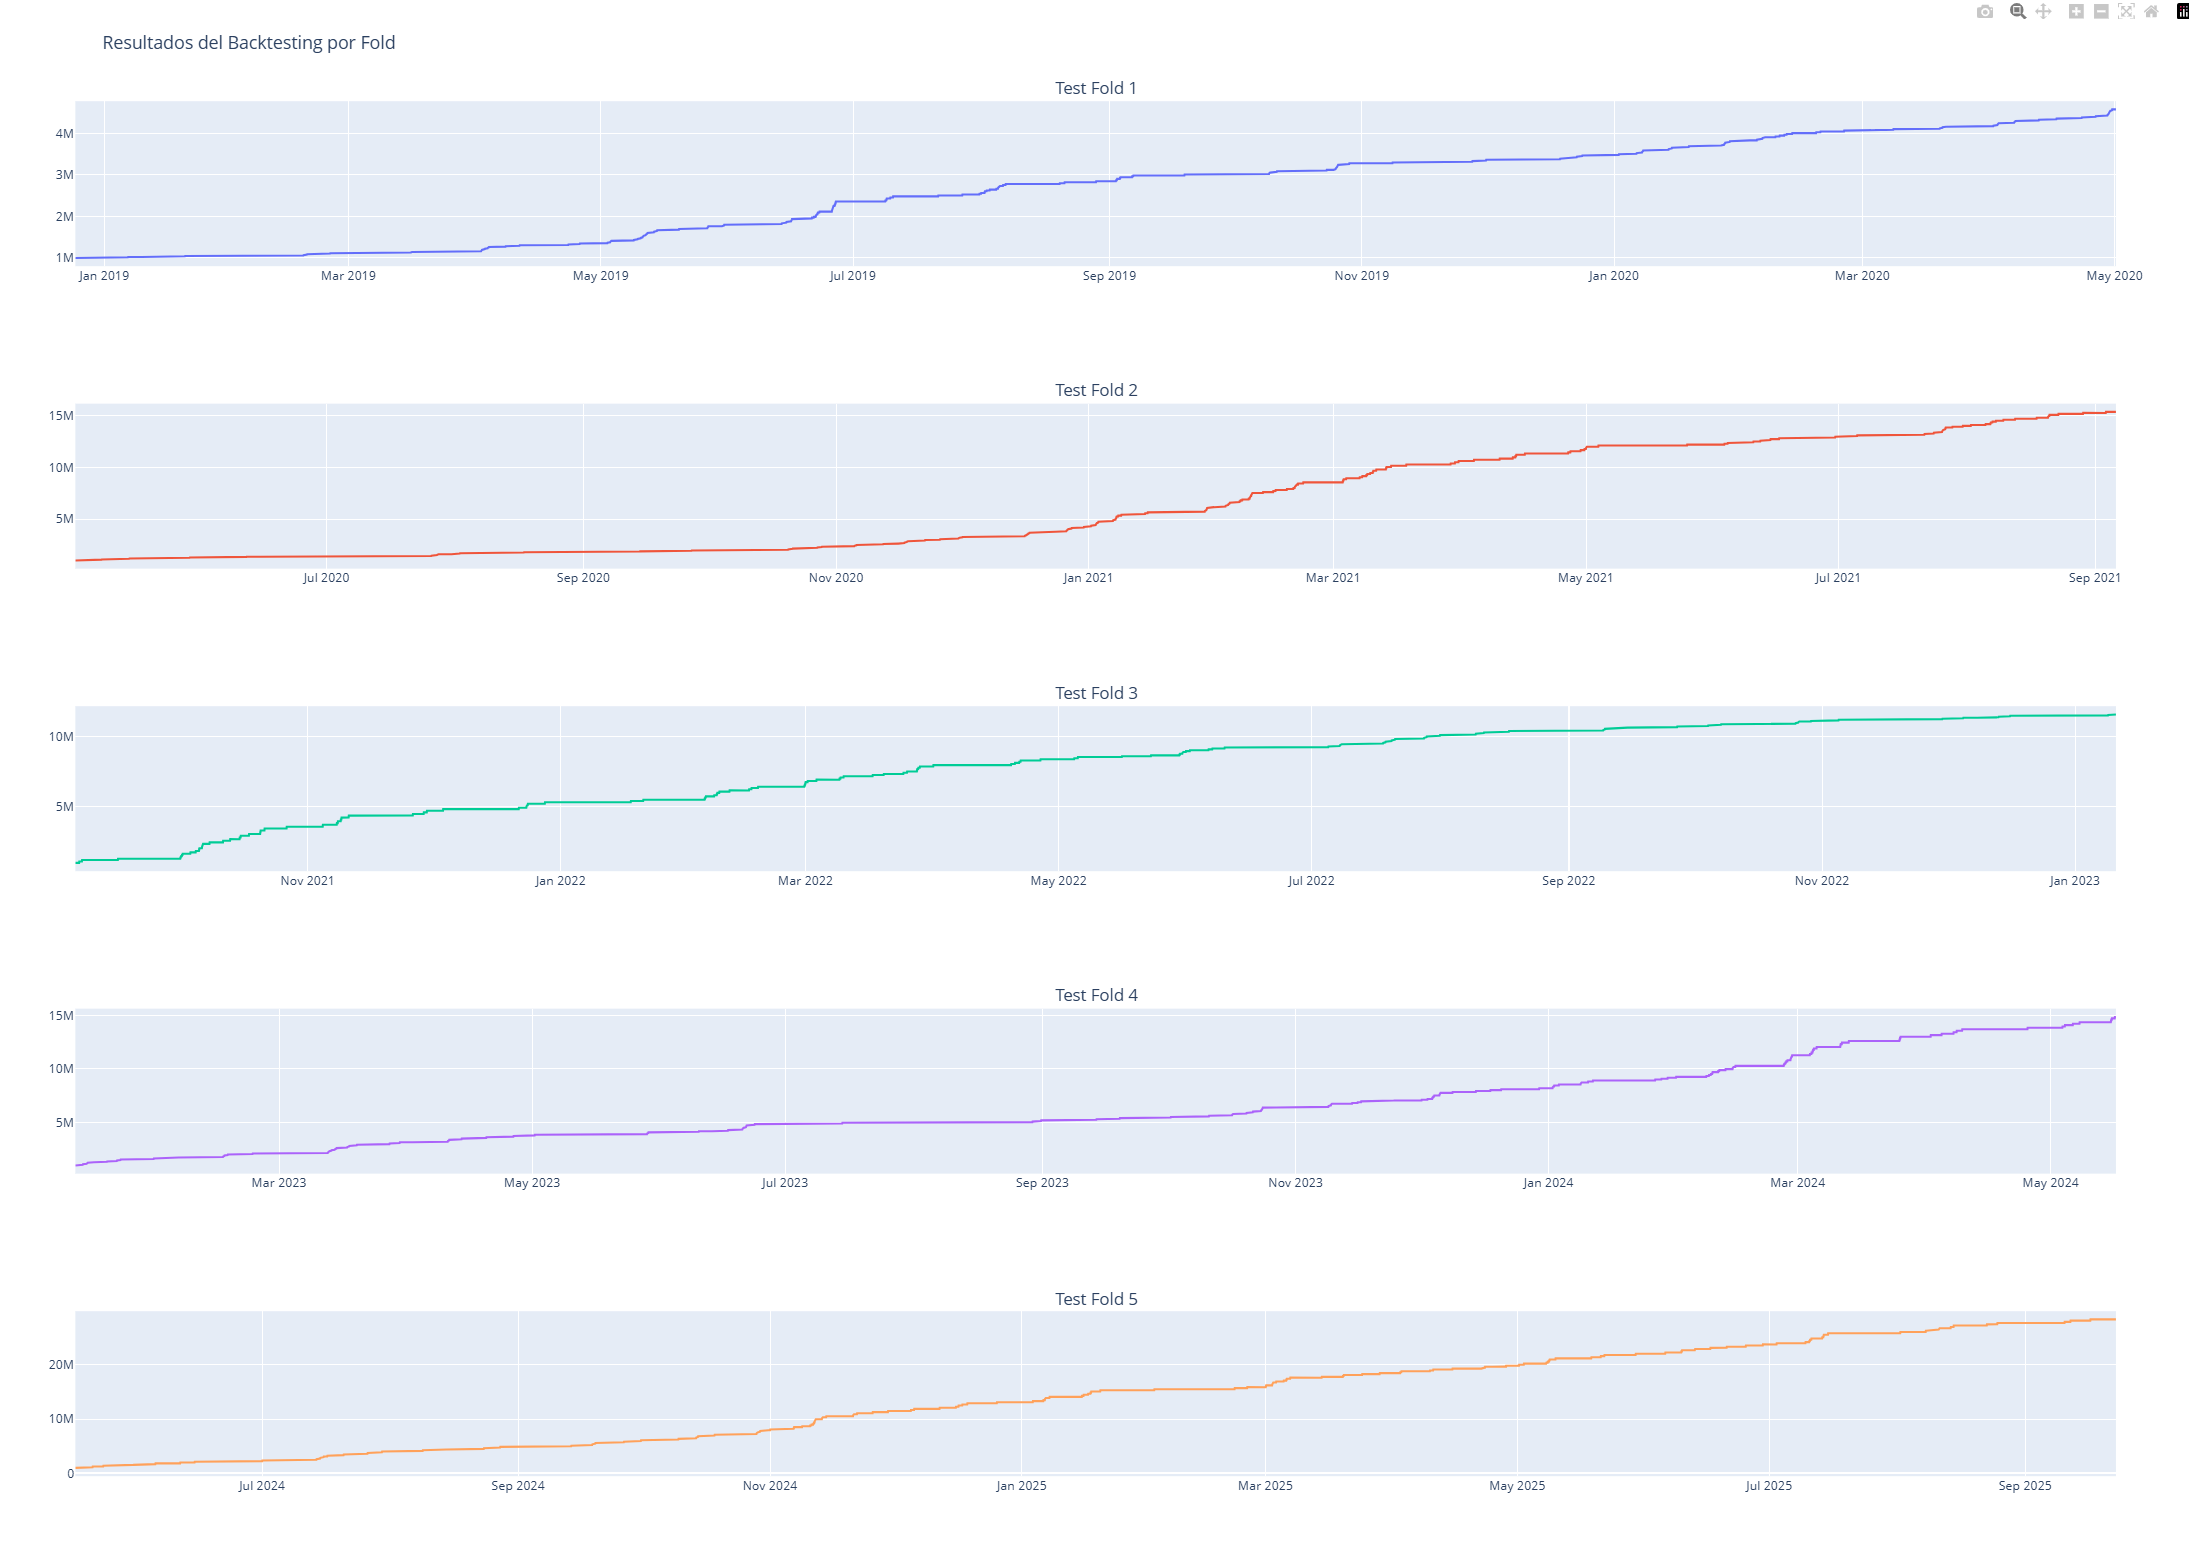

For a comprehensive evaluation of the trading strategy's performance, Win Rate and Maximum Drawdown were selected as the primary metrics. This choice is deliberate, as they provide a balanced and crucial perspective by measuring two complementary aspects of performance: the frequency of success and the magnitude of risk.

**Win Rate (Measuring Consistency and Frequency of Success)**

The Win Rate calculates the percentage of total trades that resulted in a profit. It is a straightforward metric that answers the fundamental question: "How often is the strategy correct?" A high win rate indicates that the strategy is consistent and reliable in identifying profitable opportunities.

However, win rate alone is insufficient. A strategy could win 90% of its trades but be unprofitable if the 10% of losses are substantial enough to erase all the small gains. This highlights its main limitation and demonstrates the need for a risk-oriented metric.

**Maximum Drawdown (Measuring Risk and Resilience)**

The Maximum Drawdown measures the largest peak-to-trough decline in the portfolio's value. In simple terms, it quantifies the worst-case loss the strategy experienced during the testing period. This metric is critical as it answers the question: "How much money could I lose before the strategy recovers?"

### Monthly metrics

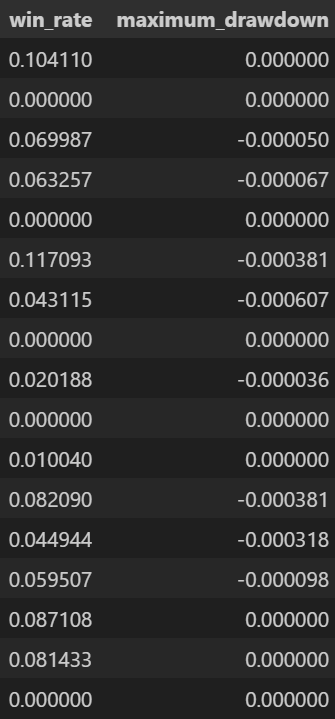

#### Quarterly metrics

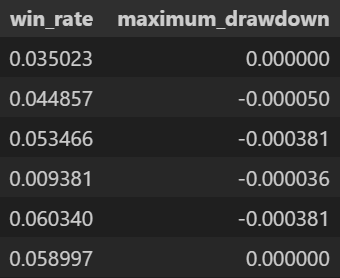

#### Yearly metrics

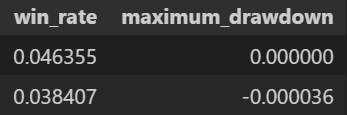